# Resource Description Framework (RDF)

In this notebook, we will learn about the concepts associated with the Resource Descriptiion Framework (RDF). 

This notebook is structured as follows:
* [RDF Triple](#RDF_Triple)
* [Blank Nodes](#Blank_Nodes)
* [Literals](#Literals)
* [RDF Graphs](#RDF_Graphs)
* [Exercises](#Exercises3)

To handle RDF data, we are going to use the `rdflib` library https://rdflib.readthedocs.io. To install this library execute the following command in the terminal `conda install -c conda-forge rdflib`.

In [2]:
! pip install rdflib

     |████████████████████████████████| 482 kB 4.1 MB/s 
     |████████████████████████████████| 41 kB 492 kB/s 


In [4]:
import rdflib

<a id='RDF_Triple'></a> 
## RDF Triple

RDF defines a graph-based data model, where the nodes of the graph represent entities/values and the edges represent the relationships among them. 

In RDF, the basic unit to represent entities and relationships is the **RDF triple**. Each triple is of the form `subject predicate object .`.   

For example, the following RDF triple (in [N-Triples](https://www.w3.org/TR/n-triples/)) states that *Marie Curie discovered Radium*:

$<http://example.org/science#Marie_Curie> <http://example.org/science#discovered> <http://example.org/science#Radium> .$

To create an RDF triple using `rdflib`, we first create each of the **RDF terms** used in the triple. The RDF terms are:
* **URIs**: used to globally identify resources. To create a URI in RDFLib we use `rdflib.URIRef`
* **Blank nodes**: refer to resources without identifiers and not globally addressable. To create a blank node in RDFLib we use `rdflib.BNode` 
* **Literals**: concrete data values (strings, integers, floats, dates, etc.). To create a literal in RDFLib we use `rdflib.Literal` 

For example, in the following we create the RDF terms for the given RDF triple about Marie Curie.  

In [5]:
mcurie = rdflib.URIRef('http://example.org/science#Marie_Curie')
discovered = rdflib.URIRef('http://example.org/science#discovered')
radium = rdflib.URIRef('http://example.org/science#Radium')

Now, we can create an RDF triple by creating a tuple structure in Python, using the previously defined subject (variable `curie`), predicate (variable `discovered`), and object (variable `radium`). 

In [6]:
triple = (mcurie, discovered, radium)
triple

(rdflib.term.URIRef('http://example.org/science#Marie_Curie'),
 rdflib.term.URIRef('http://example.org/science#discovered'),
 rdflib.term.URIRef('http://example.org/science#Radium'))

Formally, RDF triples can be defined as a 3-tuple $<s,p,o> \ \in \ (U \cup B) \times U \times (U \cup B \cup L)$, where $U$ is the set of URIs, $B$ the set of blank nodes, and $L$ the set of RDF literals. This means that:
* **Subjects** can be URIs or blank nodes
* **Predicates** can only be URIs 
* **Objects** can be URIs, blank nodes, or RDF literals

So far, we have learned how to create triples with URI terms. In the following sections, we will learn more about [blank nodes](#Blank_Nodes) and [literals](#Literals).

<a id='Blank_Nodes'></a> 
## Blank Nodes

Blank nodes (or bnodes) are RDF terms that refer to resources without a known identifier. Formally, blank nodes represent *existential variables*, i.e., they indicate that the resource exists but the concrete value is not given.  

For example, assume that we want to model the statement *Marie Curie discovered something*, but we do not know exactly what the discovery was. We can use a blank node in the object position of the triple to indicate that the value of the discovery is, in this example, unknown:

$
<http://example.org/science#Marie_Curie> <http://example.org/science#discovered> _:x . 
$

To represent blank nodes in the [N-Triples](https://www.w3.org/TR/n-triples/) serialization, we use the prefix `_:` before the label of the blank node.  

**Important.** If the same blank node label (for example, `_:x`) appears in different RDF graphs, they do not represent the same resource. This is what we mean when we say that blank nodes are not *globally addressable*.  

In RDFLib, we create a blank node using the function `rdflib.BNode`. 

In [7]:
discovery = rdflib.BNode()
discovery

rdflib.term.BNode('Nd81716ed93f1446db7e9e7714c0f4517')

Note that, in this example, RDFLib assigned an internal label or hash to the blank node. 

**Important.** RDFLib allows for specifying a label for the blank node. However, this functionality should only be used by query engines and not when we are creating the RDF terms and triples manually. 

Now we can use the blank node `discovery` in an RDF triple to model that *Marie Curie discovered something*. 

In [8]:
triple2 = (mcurie, discovered, discovery)
triple2

(rdflib.term.URIRef('http://example.org/science#Marie_Curie'),
 rdflib.term.URIRef('http://example.org/science#discovered'),
 rdflib.term.BNode('Nd81716ed93f1446db7e9e7714c0f4517'))

Note that we can reuse the same blank node in another RDF triple. For example, we can model that *Pierre Curie discovered something* and that something is the same resource discovered by Marie Curie, as follows:

$<http://example.org/science#Pierre_Curie> <http://example.org/science#discovered> _:x .$ 

In this case, we just need to create an URI term for Pierre Curie, and reuse the terms in the variables `discovered` and `discovery` that we previously created.  

In [9]:
pcurie = rdflib.URIRef('http://example.org/science#Pierre_Curie')
triple3 = (pcurie, discovered, discovery)
triple3

(rdflib.term.URIRef('http://example.org/science#Pierre_Curie'),
 rdflib.term.URIRef('http://example.org/science#discovered'),
 rdflib.term.BNode('Nd81716ed93f1446db7e9e7714c0f4517'))

<a id='Literals'></a> 
## Literals

Literals allow for specifying values (strings, numbers, dates, etc.) in RDF. 

For example, we use a literal to model the statement *Marie Curie's birthname is Maria Salomea Skłodowska*, as follows:

$<http://example.org/science#Marie_Curie> <http://example.org/science#birthname> "Maria Salomea Skłodowska" .$

In the [N-Triples](https://www.w3.org/TR/n-triples/) serialization, literals are enclosed in quotes. 

To create a literal in RDFLib, we use the function `rdflib.Literal`.  

In [10]:
name = rdflib.Literal("Maria Salomea Skłodowska")
name

rdflib.term.Literal('Maria Salomea Skłodowska')

The previous literal is considered a *simple* literal. In RDF, it is possible to create literals annotated with [language tags](#Language-tagged_Literals) and [datatypes](#Datatyped_Literals).  

<a id='Language-tagged_Literals'></a> 
### Language-tagged Literals

In some cases, it is necessary to specify the language (English, German, etc.) of a literal value.

In the [N-Triples](https://www.w3.org/TR/n-triples/) serialization, we specify the language tag preceded by '@'. 
For example, the following RDF triple models the statement *Marie Curie's thesis title is "Recherches sur les substances radioactives" (in French)*: 

$<http://example.org/science#Marie_Curie> <http://example.org/science#thesisTitle> "Recherches sur les substances radioactivesl"@fr .$

The valid language tags are specified in the document [IETF Current Best Practices - Tags for Identifying Languages](https://tools.ietf.org/html/bcp47). In this notebook, we will use language tags for English (`en`), German (`de`), Spanish (`es`), and French (`fr`) literals.  

To create a language-tagged literal in RDFLib, we use the function `rdflib.Literal`, and specify the corresponding language in the `lang` input parameter.  

In [11]:
title_fr = rdflib.Literal("Recherches sur les substances radioactives", lang='fr')
title_fr

rdflib.term.Literal('Recherches sur les substances radioactives', lang='fr')

**Important.** Two RDF literals with the same lexical form (value) but different language tags are considered different.  

For example, consider the following comparison between the variable `title_fr` and an RDF literal with the same value as `title_fr` but with an English language tag (omit the fact that it is incorrect to say that the given value is a valid text in Engish).  

In [12]:
title_en = rdflib.Literal("Recherches sur les substances radioactives", lang='en')
title_fr == title_en

False

The comparison confirms that the two RDF literals are different, because they have different language tags. 

Similarly, if we compare a language-tagged literal with a simple literal with the same lexical form, we will obtain that the two literals are different. 

In [13]:
title_simple = rdflib.Literal("Recherches sur les substances radioactives")
title_fr == title_simple

False

<a id='Datatyped_Literals'></a> 
### Datatyped Literals

In RDF, it is possible to specify the datatype (integer, float, date, year, etc.) of a literal. 

In the [N-Triples](https://www.w3.org/TR/n-triples/) serialization, we specify the datatype preceded by '^^'. 
For example, the following RDF triple models the statement *Marie Curie's birthdate is "1867-11-07" (date)*: 

$<http://example.org/science#Marie_Curie> <http://example.org/science#birthDate> "1867-11-07"^^<http://www.w3.org/2001/XMLSchema#date> .$

The valid datatypes are defined in the [XML Schema 1.1 Part 2: Datatypes](http://www.w3.org/TR/xmlschema11-2/). In this notebook, we will use `xsd:boolean`, `xsd:date`, `xsd:integer`, `xsd:float`, and `xsd:gYear`. 

To create a datatyped literal in RDFLib, we use the function `rdflib.Literal`, and specify the corresponding datatype in the `datatype` input parameter.  In addition, we can use the `rdflib.XSD` namespace instead of writing the full URI of the datatype. 

In [14]:
date = rdflib.Literal("1867-11-07", datatype=rdflib.XSD.date)
date

rdflib.term.Literal('1867-11-07', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date'))

**Important.** Two RDF literals with the same lexical form (value) but different datatypes are considered different.  

For example, consider the following comparison between two literals (`literal1` and `literal2`) witht the same lexical form but different datatypes. 

In [15]:
literal1 = rdflib.Literal("1", datatype=rdflib.XSD.integer)
literal2 = rdflib.Literal("1", datatype=rdflib.XSD.float)
literal1 == literal2

False

**Important.** The RDF specification defines that two RDF literals with the same datatype, different lexical form but with a lexical form that represents the same value are also considered different.  However, RDFLib does not follow this definition by default. To ensure that RDFLib follows the RDF specification, we need to specify `normalize=False` when creating the literal. 

For example, consider the following comparison between two literals (`literal3` and `literal4`) with the different lexical forms that represents the same value (in this case, the number 1).

In [16]:
literal3 = rdflib.Literal("01", datatype=rdflib.XSD.integer, normalize=False)
literal4 = rdflib.Literal("1", datatype=rdflib.XSD.integer, normalize=False)
literal3 == literal4

False

### Summary on Literal Term Equality

Two literals are term-equal (the same RDF literal) if and only if the two lexical forms, the two datatype IRIs, and the two language tags (if any) compare equal, character by character. Thus, two literals can have the same value without being the same RDF term.

<a id='RDF_Graphs'></a> 
## RDF Graphs

An RDF graph is a set of RDF triples. To create an RDF graph in RDFLib, we use the function `rdflib.Graph`. This function creates an empty graph.  

In [17]:
g1 = rdflib.Graph()
g1

<Graph identifier=N64ba48b077664e1c8cd3f4c746ad9c09 (<class 'rdflib.graph.Graph'>)>

We can add triples to the graph with the function `add` as follows:  

In [18]:
# Creation of RDF Terms
mcurie = rdflib.URIRef('http://example.org/science#Marie_Curie')
discovered = rdflib.URIRef('http://example.org/science#discovered')
radium = rdflib.URIRef('http://example.org/science#Radium')
# Creation of an RDF triple (optional)
triple = (mcurie, discovered, radium)
# Adding the triple to the graph
g1.add(triple)

<Graph identifier=N64ba48b077664e1c8cd3f4c746ad9c09 (<class 'rdflib.graph.Graph'>)>

We will now add another triple that we created in the previous sections. 

In [19]:
g1.add(triple2)

<Graph identifier=N64ba48b077664e1c8cd3f4c746ad9c09 (<class 'rdflib.graph.Graph'>)>

To access the content of an RDF graph, we can iterate over the triples. For example: 

In [20]:
for t in g1:
    print(t)

(rdflib.term.URIRef('http://example.org/science#Marie_Curie'), rdflib.term.URIRef('http://example.org/science#discovered'), rdflib.term.BNode('Nd81716ed93f1446db7e9e7714c0f4517'))
(rdflib.term.URIRef('http://example.org/science#Marie_Curie'), rdflib.term.URIRef('http://example.org/science#discovered'), rdflib.term.URIRef('http://example.org/science#Radium'))


Since RDF graphs are sets of triples, typical set operations are supported such as union, intersection, and difference. 

To illustrate these operations, in the following we create another RDF graph `g2` and add some triples that were created in previous sections. 

In [21]:
g2 = rdflib.Graph()
g2.add(triple2)
g2.add(triple3)

<Graph identifier=Nadad367797ed41b98eafdc76d488fcf4 (<class 'rdflib.graph.Graph'>)>

### Union of RDF Graphs

The union of two RDF graphs $G_1$ and $G_2$ corresponds to the RDF triples that belong either to $G_1$ or to $G_2$.  

In the union of RDF graphs, triples in common in both graphs appear only once.

To perform the union of two RDF graphs created with RDFLib, we use the set operator `|` of Python. 

In [22]:
union_graph = g1 | g2
for t in union_graph:
    print(t)

(rdflib.term.URIRef('http://example.org/science#Pierre_Curie'), rdflib.term.URIRef('http://example.org/science#discovered'), rdflib.term.BNode('Nd81716ed93f1446db7e9e7714c0f4517'))
(rdflib.term.URIRef('http://example.org/science#Marie_Curie'), rdflib.term.URIRef('http://example.org/science#discovered'), rdflib.term.BNode('Nd81716ed93f1446db7e9e7714c0f4517'))
(rdflib.term.URIRef('http://example.org/science#Marie_Curie'), rdflib.term.URIRef('http://example.org/science#discovered'), rdflib.term.URIRef('http://example.org/science#Radium'))


In [34]:
!pip install pydotplus
!pip install graphviz

In [35]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [38]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

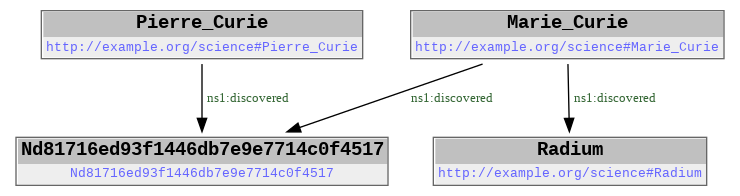

In [37]:
visualize(union_graph)

### Intersection of RDF Graphs

The union of two RDF graphs $G_1$ and $G_2$ corresponds to the RDF triples that $G_1$ and $G_2$ have in common. 

To perform the intersection of two RDF graphs created with RDFLib, we use the set operator `&` of Python. 

In [23]:
intersection_graph = g1 & g2
for t in intersection_graph:
    print(t)

(rdflib.term.URIRef('http://example.org/science#Marie_Curie'), rdflib.term.URIRef('http://example.org/science#discovered'), rdflib.term.BNode('Nd81716ed93f1446db7e9e7714c0f4517'))


### Difference of RDF Graphs

The difference of two RDF graphs $G_1$ and $G_2$ corresponds to the RDF triples that belong to $G_1$ and do not belong to $G_2$. 

To perform the difference of two RDF graphs created with RDFLib, we use the set operator `-` of Python. 

In [24]:
difference_graph = g1 - g2
for t in difference_graph:
    print(t)

(rdflib.term.URIRef('http://example.org/science#Marie_Curie'), rdflib.term.URIRef('http://example.org/science#discovered'), rdflib.term.URIRef('http://example.org/science#Radium'))


**Important.** The difference operation is not symmetric.

<a id='Exercises3'></a>
## Exercises

**Exercise 1.** Create an empty RDF graph using RDFLib. 

In [25]:
g = rdflib.Graph()

**Exercise 2.** Create RDF triples in RDFLib for the following triples in N-triples serialization.

* $<http://example.org/science#Alan_Turing> <http://example.org/science#field> <http://example.org/science#ComputerScience> .$
* $<http://example.org/science#Alan_Turing> <http://example.org/science#field> <http://example.org/science#Logic> .$
* $<http://example.org/science#Alan_Turing> <http://example.org/science#bornYear> "1938"^^<http://www.w3.org/2001/XMLSchema#gYear> .$
* $<http://example.org/science#Alan_Turing> <http://example.org/science#thesisTitle> "Systems of Logic Based on Ordinals"@en .$

Add the triples to the graph created in Exercise 1 using RDFLib.

In [29]:
aturing = rdflib.URIRef('http://example.org/science#Alan_Turing')
field = rdflib.URIRef('http://example.org/science#field')
compscience = rdflib.URIRef('http://example.org/science#ComputerScience')
logic = rdflib.URIRef('http://example.org/science#Logic')
bornyear = rdflib.URIRef('http://example.org/science#bornYear')
literalyear = rdflib.Literal("1938", datatype=rdflib.XSD.gYear)
thesistitle = rdflib.URIRef('http://example.org/science#thesisTitle')
literaltitle_en = rdflib.Literal("Systems of Logic Based on Ordinals", lang = 'en')

triple01 = (aturing, field, compscience)
triple02 = (aturing, field, logic)
triple03 = (aturing, bornyear, literalyear)
triple04 = (aturing, thesistitle, literaltitle_en)

g.add(triple01)
g.add(triple02)
g.add(triple03)
g.add(triple04)

<Graph identifier=N562267011b3d4cc39d1e8c158ff90046 (<class 'rdflib.graph.Graph'>)>

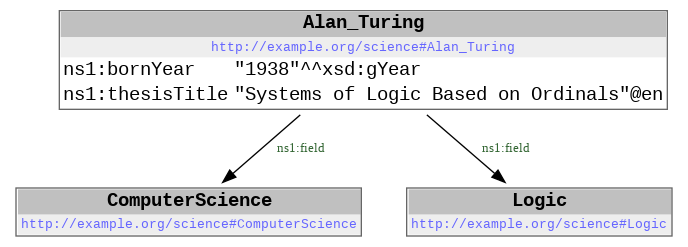

In [39]:
visualize(g)

**Exercise 3.** Given the following RDF literals in N-triples notation, create the literals using RDFLib. Make sure to specify `normalize=False` in RDFLib, to comply with the behavior of literals as defined in the RDF specification. 
* $1000.0^^<http://www.w3.org/2001/XMLSchema#integer>$ 
* $1000.0^^<http://www.w3.org/2001/XMLSchema#float>$
* $1000.00^^<http://www.w3.org/2001/XMLSchema#float>$


**Exercise 4.** Compare the literals created in Exercise 3. Which ones are different? 

In [30]:
literal01 = rdflib.Literal("1000.0", datatype=rdflib.XSD.integer, normalize=False)
literal02 =rdflib.Literal("1000.0", datatype=rdflib.XSD.float, normalize=False)
literal03 =rdflib.Literal("1000.00", datatype=rdflib.XSD.float, normalize=False)

print (literal01==literal02, 
literal01==literal03, 
literal02==literal03)

False False False
